In [1]:
import pandas as pd
import numpy as np
#Load common functions
# %run common.ipynb
import ipynb.fs.full.common as common

## NOTA IMPORTANTE:
- MML habla de GNP (Gross National Product) == PNB (Producto Bruto Nacional)

Sin embargo, no encontramos existencia de datos de GNP año a año desde 1960 hasta al menos 2000, país por país, para todos los países.
Consultado con Igal, corroboró que no se suele trabajar con GNP.

- El set de datos a comparar entonces es GDP (Gross Domestic Product) == PIB (Producto Interno Bruto)

- La comparación no es directa. Sin embargo, podemos asumir que la diferencia entre GNP y GDP de cada pais es NO significativa.

Más aún, si llegarámos a encontrar algun dataset de GNP de algún país en algun periodo, podriamos efectivamente compararlos. Tal vez, teniendo un candidato de país importante por región alcance (uno de LAM, uno de DEVELOPED, etc)

Otro punto a tener en cuenta es la unidad de medida.
- MML midio GNP a valor USD de 1960
- Nuestro dataset de comparación versa sobre el GDP a valor USD 2017, ajustado por inflación y diferencias en el costo de vida, conocido como DOLAR PPP.
- Es decir, debemos hacer conversión de unidades para que ambos esten expresados en la misma.

Link al dataset:
https://www.gapminder.org/data/documentation/gd001/
La version usada es la ultima disponible hoy en dia (V28)

TODO:
- Convertir unidades (hablar con Igal para ver como calcular o de donde obtener el cociente)
- Encontrar algunos GNP para compararlos con sus respectivos GDP (obvio, tambien en mismas unidades) y ver si efectivamente son iguales (sino me mato (?))
- En DEVELOPED, falta información de Puerto Rico. Desde 1990 se encuentra aca -> https://data.worldbank.org/indicator/NY.GDP.MKTP.PP.KD?locations=PR

In [2]:
MML_VARIABLE_ANALYZED = 'GNPXC'
REGION = 'LAM' 
COUNTRY_COL_NAME = 'Country Name'
CONVERSION_COEFICIENT = 15 
#TODO. ESTE 15 SALE DE LA OBSERVACION DE DF_COMPARISON, EN DONDE AJUSTAMOS PARA QUE COINCIDA EL PUNTO MEDIO, 1985. CORRER PRIMERO CON 1, Y LUEGO CON 15 PARA OBSERVAR DIFERENCIAS
CONVERSION_COEFICIENT = 1 #TODO.

In [3]:
df = pd.read_excel(f"data/{REGION}/GM-GDP per capita - Dataset - v28.xlsx", sheet_name='data-GDP-per-capita-in-columns')
df[0:5]

,geo,Country Name,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,afg,Afghanistan,683.0,683.0,683.0,683.0,683.0,683.0,683.0,683.0,...,2689.0,2747.0,2806.0,2866.0,2928.0,2991.0,3056.0,3122.0,3189.0,3257.0
1,alb,Albania,755.0,755.0,755.0,755.0,755.0,756.0,756.0,756.0,...,25066.0,25606.0,26157.0,26721.0,27296.0,27884.0,28485.0,29098.0,29725.0,30365.0
2,dza,Algeria,796.0,796.0,796.0,796.0,796.0,796.0,796.0,796.0,...,14527.0,14840.0,15159.0,15486.0,15819.0,16160.0,16508.0,16864.0,17227.0,17598.0
3,and,Andorra,1355.0,1357.0,1360.0,1363.0,1365.0,1368.0,1370.0,1372.0,...,68876.0,70359.0,71874.0,73422.0,75004.0,76619.0,78269.0,79955.0,81677.0,83436.0
4,ago,Angola,700.0,702.0,705.0,709.0,711.0,714.0,718.0,721.0,...,7998.0,8170.0,8346.0,8526.0,8709.0,8897.0,9089.0,9284.0,9484.0,9689.0


In [4]:
del df['geo']

df.columns = df.columns.astype(str)

In [5]:
def fix_countries_for_region(df, region=REGION):
    '''Match country column name in dataset with MML dict of country names for region.
    Unfortunately, it's a manual job. We know which names are missing according to MML, but we don't how the truth dataset named that country (if exists at all).
    
    '''
    if region == 'DEVELOPED':
        fix_countries_for_developed(df)
    if region == 'LAM':
        fix_countries_for_lam(df)
def fix_countries_for_lam(df):
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'Brazil', 'Brasil')
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'Trinidad and Tobago', 'Trinidad y Tobago')
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'Dominican Republic', 'Republica Dominicana')
def fix_countries_for_developed(df):
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'Ukraine', 'Ucrania')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Bosnia and Herzegovina','Bosnia y Herzegovina')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Kyrgyz Republic','Kirguistan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Germany','Alemania')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'France','Francia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Macedonia, FYR','Macedonia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Slovenia','Eslovenia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Slovak Republic','Eslovaquia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Switzerland','Suiza')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Denmark','Dinamarca')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'United Kingdom','Reino Unido')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'New Zealand','Nueva Zelanda')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Spain','España')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Poland','Polonia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Ireland','Irlanda')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Romania','Rumania')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Finland','Finlandia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Moldova','Moldavia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Sweden','Suecia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Kazakhstan','Kazajistan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Russia','Rusia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Latvia','Letonia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Norway','Noruega')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Lebanon','Libano')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Czech Republic','Republica Checa')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Hungary','Hungria')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Azerbaijan','Azerbaiyan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Japan','Japon')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'United States','EEUU')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Greece','Grecia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Italy','Italia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Belgium','Belgica')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Belarus','Bielorrusia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Tajikistan','Tayikistan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Croatia','Croacia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Lithuania','Lituania')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Netherlands','Paises Bajos')
  
    

In [6]:
print(f"Missing countries for region {REGION}")
missing_countries = common.get_missing_countries_for_region(df, COUNTRY_COL_NAME, REGION)
print(missing_countries)
fix_countries_for_region(df)
missing_countries = common.get_missing_countries_for_region(df, COUNTRY_COL_NAME, REGION)
print("Missing countries for region after fix")
print(missing_countries)

Missing countries for region LAM
{'Brasil', 'Trinidad y Tobago', 'Republica Dominicana'}
Missing countries for region after fix
set()


In [7]:
df_truth = common.get_countries_for_region(df, COUNTRY_COL_NAME, REGION)
# assert len(df_truth) == len(common.regions[REGION]['countries']), 'MISSING COUNTRIES FOR REGION'

In [8]:
years_filtered = np.arange(1970,2001,1)
columns_filter = np.append([COUNTRY_COL_NAME],years_filtered)

df_truth = df_truth[columns_filter]
assert 0 == df_truth.isna().sum().sum(), "MISSING VALUES. CONSIDER FILL STRATEGY" #If 0, then we don't have missing values.
assert not (df_truth == 0).any().any(), "CELLS WITH 0" 

### MISSING VALUES PATCH (DISMISSED. Remove)
We don't have information for **Venezuela**.
Try to get it, and then inject it in dataset.
In the meantime, will fill those values with 

Finally, we got our truth dataframe. Now, MML

In [9]:
df_mml = common.get_mml_data(REGION)
df_mml = df_mml[['Year',MML_VARIABLE_ANALYZED]]
df_mml = df_mml[df_mml.Year >= 1970]
df_mml = df_mml[df_mml.Year <= 2000]
df_mml[MML_VARIABLE_ANALYZED] = df_mml[MML_VARIABLE_ANALYZED] * CONVERSION_COEFICIENT
df_mml[0:3]

,Year,GNPXC
10,1970,445.5
11,1971,448.9
12,1972,452.8


In [10]:
df_truth[0:3]

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
6,Argentina,14372.0,14908.0,15203.0,15946.0,16787.0,16454.0,16228.0,17014.0,16086.0,...,15222.0,16209.0,17312.0,18092.0,17363.0,18105.0,19348.0,19866.0,18981.0,18625.0
20,Bolivia,4203.0,4274.0,4400.0,4607.0,4745.0,4957.0,5236.0,5344.0,5414.0,...,4728.0,4706.0,4805.0,4925.0,5050.0,5164.0,5312.0,5469.0,5386.0,5416.0
23,Brasil,5665.0,6170.0,6763.0,7547.0,7995.0,8241.0,8905.0,9161.0,9429.0,...,10444.0,10211.0,10537.0,10973.0,11254.0,11321.0,11524.0,11388.0,11273.0,11601.0



We need to transpose df, and group by some condition

In [11]:
df_T = df_truth.copy().set_index(COUNTRY_COL_NAME).T
df_T = df_T.reset_index().rename(columns={"index": "Year"})
df_truth = df_T.astype({'Year': 'int64'})
df_truth['mean'] = df_truth.iloc[:, 1:len(common.regions[REGION]['countries'])+1].mean(axis=1)
df_truth_aggs = df_truth[['Year','mean']]

In [12]:
df_comparison = pd.merge(df_mml,df_truth_aggs,on='Year').rename(columns={MML_VARIABLE_ANALYZED: "mml_value", "mean":"truth_mean"})
df_comparison[0:15]

,Year,mml_value,truth_mean
0,1970,445.5,6958.045455
1,1971,448.9,7135.909091
2,1972,452.8,7307.681818
3,1973,457.2,7588.545455
4,1974,462.0,7836.272727
5,1975,467.3,7890.681818
6,1976,473.1,8121.454545
7,1977,479.4,8366.772727
8,1978,486.2,8585.136364
9,1979,493.6,8736.590909


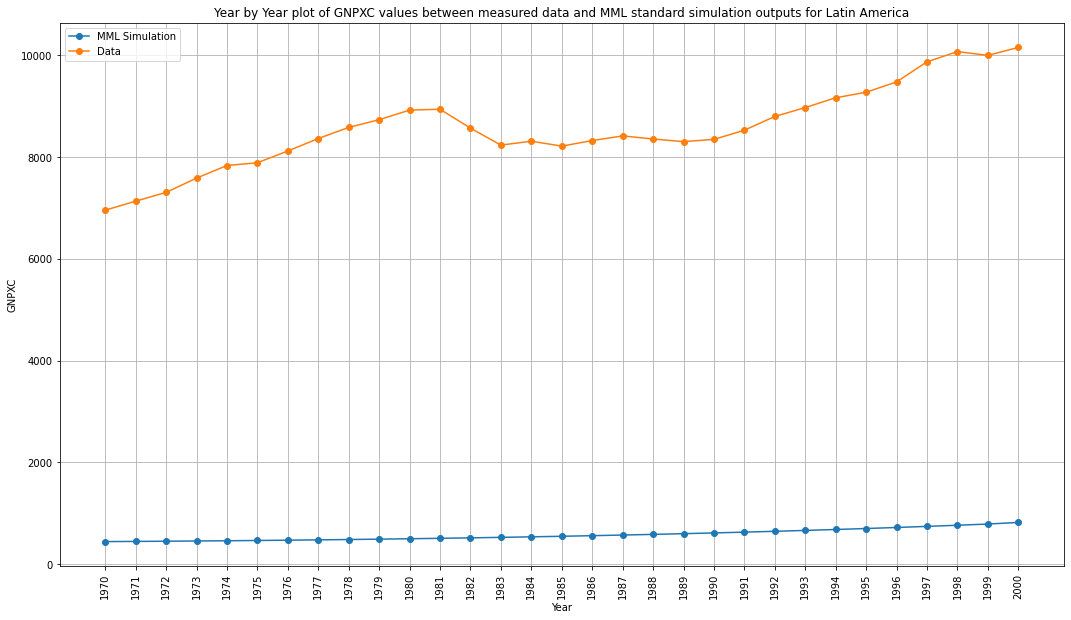

In [13]:
common.compare_mml_vs_truth_line_plot(df=df_comparison, x_col_name='Year', y_col_mml='mml_value', y_col_truth='truth_mean',variable_analyzed=MML_VARIABLE_ANALYZED, region=REGION)

In [14]:
df_comparison['proportion_difference'] = df_comparison['truth_mean'] / df_comparison['mml_value']

In [15]:
df_comparison

,Year,mml_value,truth_mean,proportion_difference
0,1970,445.5,6958.045455,15.618508
1,1971,448.9,7135.909091,15.896434
2,1972,452.8,7307.681818,16.138873
3,1973,457.2,7588.545455,16.597868
4,1974,462.0,7836.272727,16.961629
5,1975,467.3,7890.681818,16.885688
6,1976,473.1,8121.454545,17.166465
7,1977,479.4,8366.772727,17.452592
8,1978,486.2,8585.136364,17.657623
9,1979,493.6,8736.590909,17.699738


### Error visualization

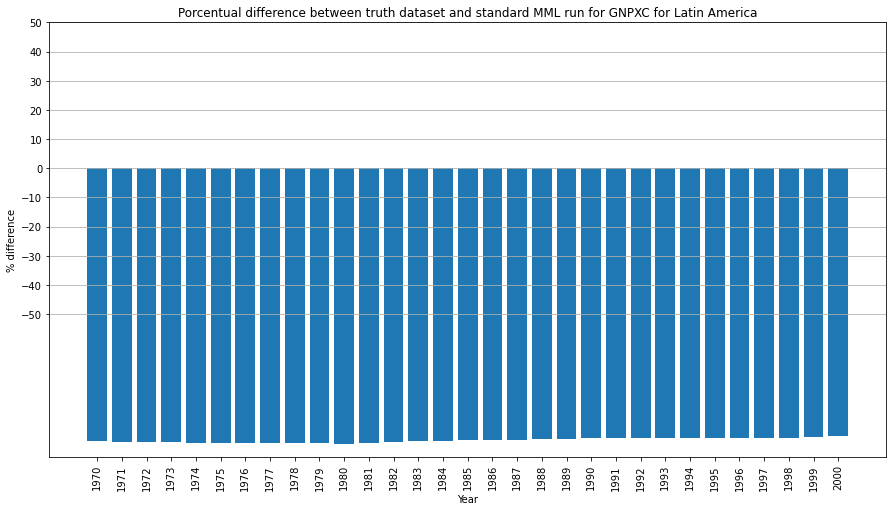

In [16]:
common.compute_porcentual_diff_between_truth_and_mml(df_comparison,'mml_value', 'truth_mean')
common.porcentual_diff_plot(df_comparison,MML_VARIABLE_ANALYZED, REGION, years_filtered, np.arange(-50,51,10))